## Book Rental Recommendation.

### Description

Book Rent is the largest online and offline book rental chain in India. They provide books of various genres, such as thrillers, mysteries, romances, and science fiction. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base. The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit. 

### Project Objective:

You, as an ML expert, should focus on improving the user experience by personalizing it to the user's needs. You have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. This will ensure that users are renting the books based on their tastes and traits.

Note: You have to perform user-based collaborative filtering and item-based collaborative filtering.

### Dataset description:

BX-Users: It contains the information of users.

user_id - These have been anonymized and mapped to integers

Location - Demographic data is provided

Age - Demographic data is provided

If available, otherwise, these fields contain NULL-values.

 

### BX-Books: 

isbn - Books are identified by their respective ISBNs. Invalid ISBNs have already been removed from the dataset.

book_title

book_author

year_of_publication

publisher


 

### BX-Book-Ratings: Contains the book rating information. 

user_id

isbn

rating - Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1–10 (higher values denoting higher appreciation), or implicit, expressed by 0.



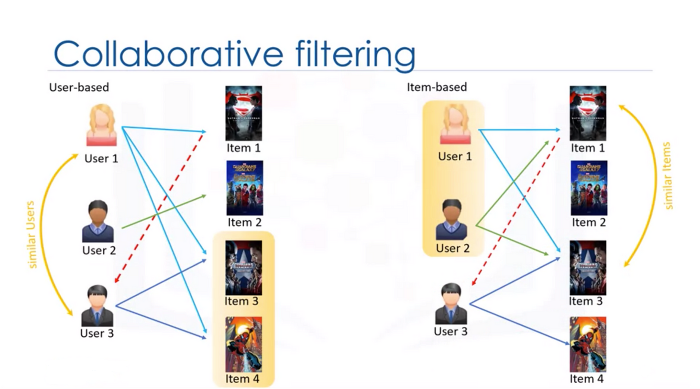

Collaborative Filtering is a recommendation technique used to create a recommendation algorithm based on the preferences of users or items (products, content, etc.). It is commonly employed in various domains such as e-commerce websites, movie and TV show platforms, music applications, and more.

The principle behind collaborative filtering is to recommend items to a user by identifying other users or items with similar preferences, based on their past choices. In other words, it tries to find users who have similar tastes and recommend items liked by those similar users.

There are two main types of collaborative filtering approaches:

- User-Based Collaborative Filtering: In this method, the preferences of a particular user are compared with the preferences of other users to find those with similar interests. Then, items liked by these similar users are recommended to the target user.

- Item-Based Collaborative Filtering: In this approach, the liking patterns of users for specific items are compared to identify similar items. Items similar to the ones the user has liked are then recommended to the target user.

### About Dataset
- Content

The Book-Crossing dataset comprises 3 files.

- Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

- Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

- Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [2]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
books = pd.read_csv("BX-Books.csv", delimiter=',', encoding="latin-1", on_bad_lines='skip')
ratings = pd.read_csv("BX-Book-Ratings.csv",  sep=',', encoding='latin-1', on_bad_lines='skip')

### Dataset Overview

In [7]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [9]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [12]:
# By using the ISBN, which is the unique code used for books, the two data sets we added before, named books and ratings, are combined.

df = ratings.merge(books, how="left", on="isbn")
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              1048575 non-null  int64 
 1   isbn                 1048575 non-null  object
 2   rating               1048575 non-null  int64 
 3   book_title           941148 non-null   object
 4   book_author          941146 non-null   object
 5   year_of_publication  941148 non-null   object
 6   publisher            941146 non-null   object
dtypes: int64(2), object(5)
memory usage: 56.0+ MB


In [14]:
df.shape

(1048575, 7)

In [15]:
df['book_title'].nunique()

230238

In [18]:
# Number of rates for each book
rating_counts = pd.DataFrame(df['book_title'].value_counts())
rating_counts.head(10)

,count
book_title,
Wild Animus,2264
The Lovely Bones: A Novel,1164
The Da Vinci Code,828
A Painted House,766
The Nanny Diaries: A Novel,759
Bridget Jones's Diary,740
The Secret Life of Bees,704
Divine Secrets of the Ya-Ya Sisterhood: A Novel,669
The Red Tent (Bestselling Backlist),668


In [22]:
# Let's remove the books with a rate less than 100 from the data set.
rare_books = rating_counts[rating_counts['count'] < 100].index
common_books = df[~df["book_title"].isin(rare_books)]
common_books.shape

(265480, 7)

In [26]:
common_books

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,600570967,6,NaN,NaN,NaN,NaN
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
9,276745,342310538,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1048549,250764,449907481,0,A Thousand Acres (Ballantine Reader's Circle),JANE SMILEY,1992,Ballantine Books
1048556,250764,451180410,0,Mortal Fear,Greg Iles,1998,Signet Book
1048558,250764,451191013,0,The Regulators,Stephen King,2002,Signet Book
1048560,250764,451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997,Signet Book


In [27]:
common_books["book_title"].nunique()

815

We now have 914 books with over 100 rates.

In [28]:
user_books_df = common_books.pivot_table(index=["user_id"], columns=["book_title"], values="rating")
user_books_df.shape

(33666, 815)

In [31]:
# Rows have users, columns have books.
user_books_df.columns

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves', 'Wuthering Heights', 'Year of Wonders',
       'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       '\O\" Is for Outlaw"'],
      dtype='object', name='book_title', length=815)

## User Based Recommendation

Selecting a Random User and Determining the Books he reads

In [199]:
#random_user = int(pd.Series(user_books_df.index).sample(1).values)

In [200]:
#random_user

48148

In [233]:
random_user = 99252 

In [234]:
random_user_df = user_books_df[user_books_df.index == random_user]

In [235]:
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

['Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
 'Message in a Bottle',
 'The Summons',
 'To Kill a Mockingbird',
 'Whispers']

We have accessed the books that the randomly selected user has read.

## Accessing the Data and IDs of Other Users Who Read the Same Books¶

In [236]:
# Let's create a new dataframe consisting of the books that the selected user has read.
books_read_df = user_books_df[books_read]
books_read_df

book_title,Anne of Green Gables (Anne of Green Gables Novels (Paperback)),Message in a Bottle,The Summons,To Kill a Mockingbird,Whispers
user_id,,,,,
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
278836,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN


In [238]:
# Create a new dataframe named user_book_count that contains information about how many of the selected user's read books were read by each user.

user_book_count = books_read_df.T.notnull().sum()
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["user_id", "Book-Count"]
user_book_count

,user_id,Book-Count
0,8,0
1,9,0
2,14,0
3,16,0
4,17,0
...,...,...
33661,278836,0
33662,278843,0
33663,278844,0
33664,278846,0


In [239]:
# Let's find users who use at least 60% of the books our users read.

perc = len(books_read) * 60 / 100
users_same_books = user_book_count[user_book_count["Book-Count"] >= perc]["user_id"]
users_same_books

890        7346
1030       8362
1389      11676
2025      16795
2575      21014
          ...  
30606    231210
31174    235105
31274    235842
31335    236283
31611    238120
Name: user_id, Length: 61, dtype: int64

### Determining the Users Most Similar to the User to be Recommended

In [240]:
# Let's gather the data of other users who are similar to the selected user.
final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)], random_user_df[books_read]])


In [241]:
final_df

book_title,Anne of Green Gables (Anne of Green Gables Novels (Paperback)),Message in a Bottle,The Summons,To Kill a Mockingbird,Whispers
user_id,,,,,
7346,0.0,NaN,8.0,0.0,NaN
8362,NaN,8.000000,NaN,0.0,0.000000
11676,3.5,2.666667,8.0,6.0,4.666667
16795,NaN,0.000000,8.0,NaN,4.500000
21014,4.5,0.000000,NaN,0.0,NaN
...,...,...,...,...,...
235105,NaN,0.000000,8.0,0.0,0.000000
235842,NaN,0.000000,0.0,0.0,NaN
236283,NaN,10.000000,0.0,0.0,0.000000


In [183]:
user_books_df.head()

book_title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
# Create a new dataframe named corr_df which will contain the correlations between users.

corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
#corr_df = user_books_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["user_id_1", "user_id_2"]
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,52584,59172,-1.000000
1,43842,99252,-0.997509
2,112001,16795,-0.997406
3,99252,201017,-0.994135
4,11676,112001,-0.989743
...,...,...,...
111,11676,16795,0.976893
112,59172,11676,0.985136
113,187145,55548,1.000000
114,196077,148744,1.000000


In [243]:
# Filter users with high correlation (above 0.50) with the selected user and create a new dataframe named top_users.

top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] > 0.50)][["user_id_2", "corr"]].reset_index(drop=True)
#top_users = corr_df[(corr_df["corr"] > 0.50)][["user_id_2", "corr"]].reset_index(drop=True)

top_users

,user_id_2,corr
0,159033,0.755929
1,187145,0.755929
2,105979,0.967868


In [244]:
top_users = top_users.sort_values(by="corr", ascending=False)
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users

,user_id,corr
2,105979,0.967868
1,187145,0.755929
0,159033,0.755929


In [245]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [246]:
#final = top_users.merge(ratings[["user_id", "isbn", "rating"]], how="inner",left_on=None )
final = top_users.merge(ratings[["user_id", "isbn", "rating"]], how="inner" )

top_users_ratings = final[final["user_id"] != random_user]
top_users_ratings

,user_id,corr,isbn,rating
0,105979,0.967868,6546927,0
1,105979,0.967868,20198906,0
2,105979,0.967868,002026478X,0
3,105979,0.967868,29066824,0
4,105979,0.967868,60008032,0
...,...,...,...,...
2352,159033,0.755929,189389617X,9
2353,159033,0.755929,1894869613,8
2354,159033,0.755929,1900097230,0
2355,159033,0.755929,1931561648,9


### Calculating the Weighted Average Recommendation Score and Recommending a Book

In [247]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["rating"]

# In this way, we have corrected the rating values according to the correlation.

In [253]:
top_users_ratings["weighted_rating"]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2352    6.803361
2353    6.047432
2354    0.000000
2355    6.803361
2356    0.000000
Name: weighted_rating, Length: 2357, dtype: float64

In [255]:
recommendation_df = top_users_ratings.groupby("isbn").agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.tail(20)

,isbn,weighted_rating
2220,939009722,0.000000
2221,939149354,0.000000
2222,941483029,0.000000
2223,944276733,0.000000
2224,945397186,6.047432
2225,960432019,4.839339
2226,961378492,0.000000
2227,961457414,0.000000
2228,962740381,0.000000
2229,962858706,6.047432


In [257]:
books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.7].sort_values("weighted_rating", ascending=False)
books_to_be_recommend

,isbn,weighted_rating
694,374404364,9.678678
818,380973847,9.678678
173,088001654X,9.678678
1453,553274295,9.678678
1312,452274427,9.678678
...,...,...
1650,618173870,3.871471
1195,446673544,3.871471
740,375703055,3.871471
465,312278586,3.871471


In [258]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [259]:
recommend = books_to_be_recommend.merge(books[["isbn", "book_title"]])
recommend = list(recommend["book_title"].loc[0:5])

In [260]:
recommend

['This Is the Story of Archibald Frisby: Who Was As Crazy for Science As Any Kid Could Be (Reading Rainbow Book)',
 'The Illustrated Man',
 'Fail Safe',
 'Where the Red Fern Grows',
 'In the Time of the Butterflies',
 'Something to Declare']

We recommended 6 Books to our randomly selected user using the user-based recommendation system.

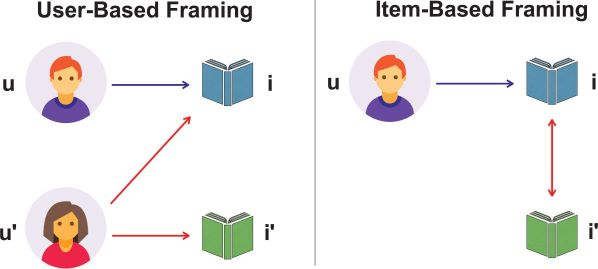

Get the ISBN of the book with the most recent rating from the user's book that received a rating of 9.

In [261]:
random_user = 99252

In [263]:
book_id = ratings[(ratings["user_id"] == random_user) & (ratings["rating"] == 9)].iloc[0][1]
book_id

'440216745'

In [265]:
books[books["isbn"] == book_id]

,isbn,book_title,book_author,year_of_publication,publisher
3115,440216745,Whispers,BELVA PLAIN,1994,Dell


In [266]:
book_name = "Whispers"
book_name = user_books_df[book_name]

In [268]:
recommend_book = user_books_df.corrwith(book_name).sort_values(ascending=False)
recommend_book

book_title
Whispers                                                               1.0
Galileo's Daughter: A Historical Memoir of Science, Faith, and Love    1.0
The Heart of a Woman                                                   1.0
A Civil Action                                                         1.0
To the Lighthouse                                                      1.0
                                                                      ... 
The Four Agreements: A Practical Guide to Personal Freedom             NaN
The Little Prince                                                      NaN
The Mists of Avalon                                                    NaN
The Silmarillion                                                       NaN
The Sum of All Fears                                                   NaN
Length: 815, dtype: float64

In [269]:
recommend = recommend_book.reset_index()
recommend.columns = ["book_name", "corr"]
recommend = list(recommend.loc[1:3, "book_name"])
recommend

["Galileo's Daughter: A Historical Memoir of Science, Faith, and Love",
 'The Heart of a Woman',
 'A Civil Action']

### Observation

In this notebook study, we made book recommendations for our randomly selected user in a large book dataset through item and user based recommendation systems. On a per-user basis, we found users who were behaviorally similar to our users and recommended their favorite books to our users. On the basis of items, we suggested the three books most similar to the rating structure of the book our user read.